In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

##modelling
from sklearn.linear_model import LogisticRegression


# splitting data and model evaluation
from sklearn.metrics import recall_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import accuracy_score

In [17]:
# read data
df = pd.read_csv('Customer-Churn-Records.csv', encoding='utf-8')

# print shape of data
print('Number of instances : ', df.shape[0])
print('Number of features : ', df.shape[1])

df.head(5)

Number of instances :  10000
Number of features :  18


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [18]:
# show data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [19]:
# initialize category and numeric data
category = [i for i in df.columns if df[i].dtype == 'object']
numerical = [i for i in df.columns if df[i].dtype != 'object']

In [20]:
# show statistical summary of numeric data
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [21]:
# show statistical summary of category data
df[category].describe().T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Card Type,10000,4,DIAMOND,2507


Data **preprocessing**

In [22]:
# show duplicated data
df.duplicated().sum()

0

In [23]:
# show duplicated data in 'Surname'
df.duplicated('Surname').sum()

7068

In [24]:
# show missing values of data
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [25]:
#feature construction
# create a new column 'Age Group' based on the 'Age' column
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40-50


In [26]:

# drop columns
df.drop(['RowNumber', 'Surname'], axis=1, inplace=True)
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned', 'Age Group'],
      dtype='object')

In [27]:
# identify categorical columns in the DataFrame
category = [i for i in df.columns if df[i].dtype == 'object']

# iterate over each categorical column
for col in category:
    # print the value counts for the current column
    print(df[col].value_counts())
    print()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64



**UNIVARIATE** **ANALYSIS**

In [28]:
# parameter description
"""
Parameters:
    data (DataFrame): The input data.
    column (str): The variable to be plotted on the x-axis (or y-axis, based on the `orient` parameter).
    hue (str): The third variable to differentiate categories (optional).
    label (str): The label for the variable on the x-axis (or y-axis).
    max_sample (int): The maximum number of categories to be shown on the plot.
    num_x_ticks (int): The number of x-axis ticks to be customized.
    x_ticks (list): The list of x-axis tick labels to be customized.
    width (float): The width of the plot.
    height (float): The height of the plot.
    y_title (float): The distance between the title and the plot.
    orient (str): The orientation of the plot ('vertical' or 'horizontal').
    title (str): The title of the plot.
"""

# define a procedure to plot countplot for univariate analysis
def countplot_univariate(data, column, hue, label, max_sample, num_x_ticks, x_ticks, width, height, y_title, orient, title):

    # create a new figure with the specified width, height and title
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # determine the order of the categories based on the maximum sample size
    order = data[column].value_counts().nlargest(max_sample).index if max_sample > 0 else data[column].value_counts().index

    # create a countplot based on the specified orientation
    if orient == 'vertical':
        g = sns.countplot(x=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel=label, ylabel='Number')
    elif orient == 'horizontal':
        g = sns.countplot(y=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel='Number', ylabel=label)

    plt.legend(title='Exited', labels=['Retain', 'Churn'], fontsize=11)

    # customize the x-axis ticks if the number of ticks is specified
    if num_x_ticks > 0:
        x_ticks_list = list(range(num_x_ticks))
        plt.xticks(x_ticks_list, x_ticks, fontsize=11)

    # calculate the total number of observations
    total = len(data[column])

    # add percentage annotations to the bars
    for p in g.patches:
        if orient == 'vertical':
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + (p.get_width() + 0.05) / 2, height + 50), \
                            ha='center', va='bottom', fontsize=12)
        elif orient == 'horizontal':
            width = p.get_width()
            percentage = (width / total) * 100
            g.annotate(f'{percentage:.1f}%', (width + 25, p.get_y() + p.get_height() / 2), \
                       ha='left', va='center', fontsize=11)

    plt.show()


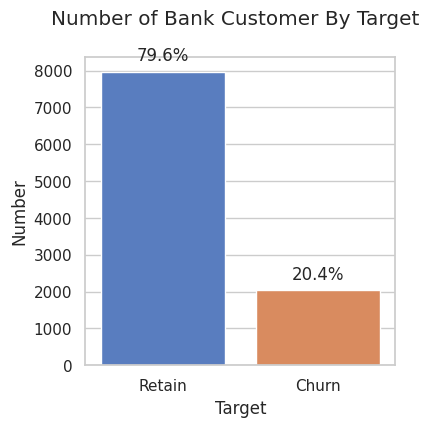

In [29]:
sns.set_theme(style="whitegrid")

chart = 'Number of Bank Customer By Target'

plt.figure(figsize=(4, 4))
plt.suptitle(f'{chart}', y=1)

# plotting countplot based on the target variable
g = sns.countplot(x='Exited', data=df, palette='muted')
g.set(ylabel='Number', xlabel='Target')

# # customize xticks
plt.xticks([0, 1], ['Retain', 'Churn'], fontsize=11)

# annotate the percentage on the chart
total = len(df['Exited'])
for p in g.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 200), \
                            ha='center', va='bottom', fontsize=12)

plt.show()

The graph above shows the distribution of the target variable, it is known that the number of Churn bank customer is 20.4%. It is concluded that there is an imbalance in the data on the target variable.

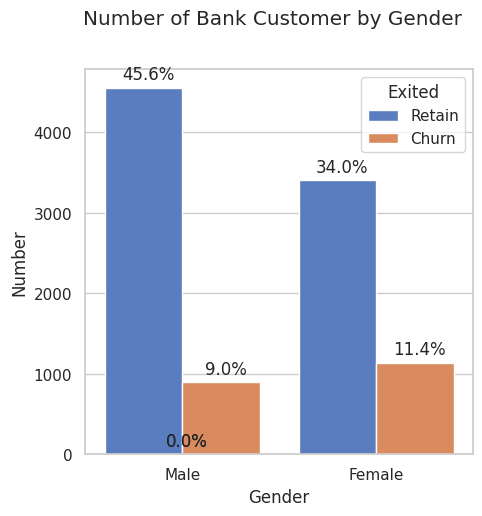

In [30]:
# initialize chart title
chart = 'Number of Bank Customer by Gender'

# apply the procedure to plot the chart
countplot_univariate(df, 'Gender', 'Exited', 'Gender', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of the target variable by 'Gender'. Female bank customers churn the most with a percentage of 11.4% compared to males who have a percentage of 9%.

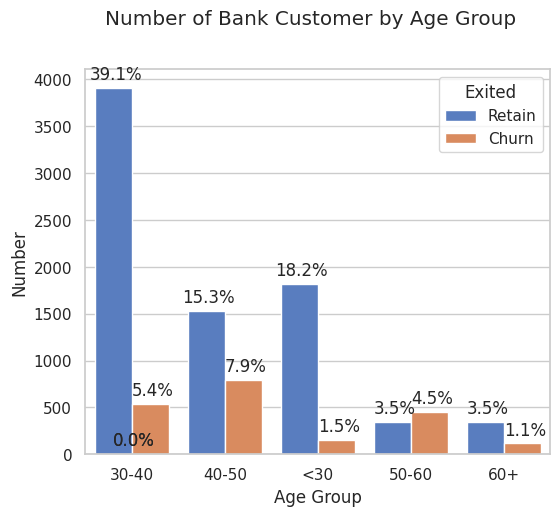

In [31]:
# initialize chart title
chart = 'Number of Bank Customer by Age Group'

# apply the procedure to plot the chart
countplot_univariate(df, 'Age Group', 'Exited', 'Age Group', 0, 0, None, 6, 5, 1, \
                     'vertical', chart)

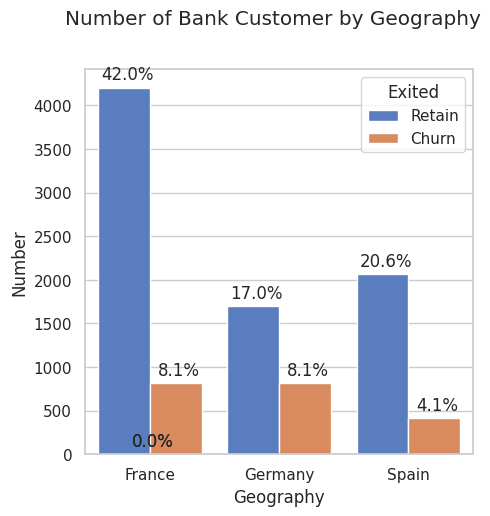

In [32]:
# initialize chart title
chart = 'Number of Bank Customer by Geography'

# apply the procedure to plot the chart
countplot_univariate(df, 'Geography', 'Exited', 'Geography', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of target variables by 'Geography'. France and Germany have a churn percentage of 8.1% each and Spain with a churn percentage of 4.1%.

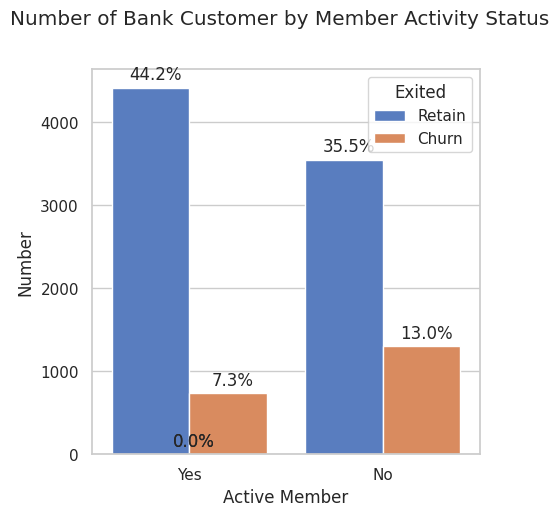

In [33]:
# initialize chart title
chart = 'Number of Bank Customer by Member Activity Status'

# apply the procedure to plot the chart
countplot_univariate(df, 'IsActiveMember', 'Exited', 'Active Member', 0, 2, ['Yes', 'No'], 5, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of the target variable by 'IsActiveMember'. Bank customers who are not active members have a higher churn percentage than active customers, with a churn percentage of 13%.

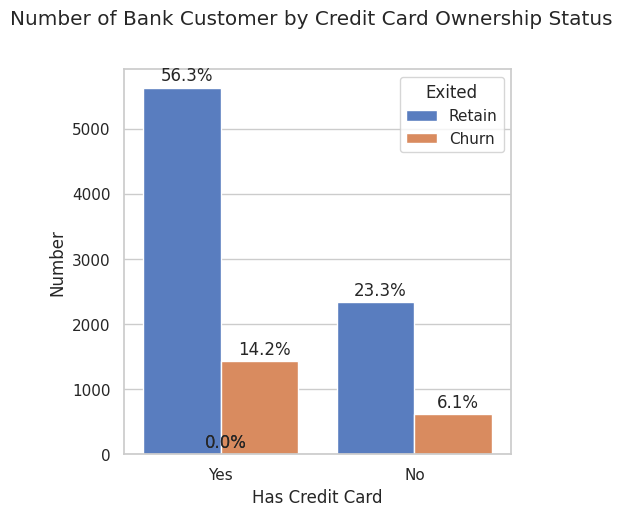

In [34]:
# initialize chart title
chart = 'Number of Bank Customer by Credit Card Ownership Status'

# apply the procedure to plot the chart
countplot_univariate(df, 'HasCrCard', 'Exited', 'Has Credit Card', 0, 2, ['Yes', 'No'], 5, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of target variables based on 'HasCrCard'. Bank customers who have a credit card churn the most with a percentage of 14.2% compared to customers who do not have a credit card with a churn percentage of 6.1%.

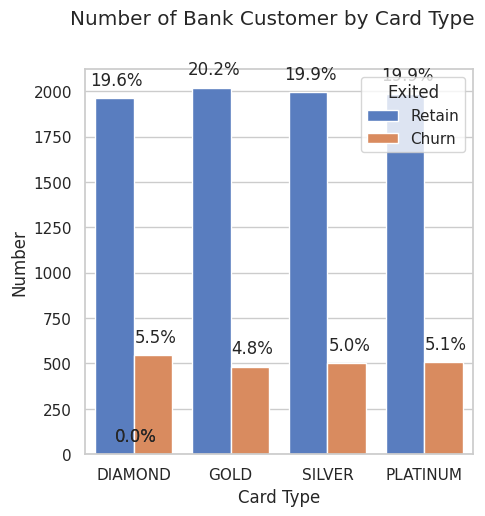

In [35]:
# initialize chart title
chart = 'Number of Bank Customer by Card Type'

# apply the procedure to plot the chart
countplot_univariate(df, 'Card Type', 'Exited', 'Card Type', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of target variables based on 'HasCrCard'. Bank customers with Diamond card type churn more with a percentage of 5.5% than others.

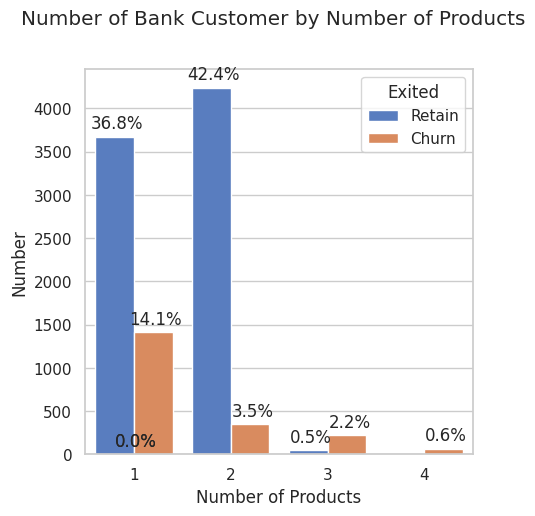

In [36]:
# initialize chart title
chart = 'Number of Bank Customer by Number of Products'

# apply the procedure to plot the chart
countplot_univariate(df, 'NumOfProducts', 'Exited', 'Number of Products', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of target variables by 'HasCrCard'. Bank customers who purchased at least 1 product through the bank have a larger churn percentage than other categories with a percentage of 14.1%.

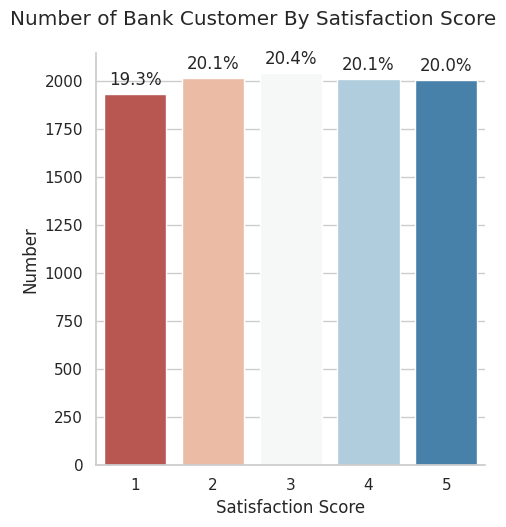

In [37]:
chart = 'Number of Bank Customer By Satisfaction Score'

g = sns.catplot(x='Satisfaction Score', data=df, kind='count', height=5, palette='RdBu')
g.set(ylabel='Number', xlabel='Satisfaction Score')
g.fig.suptitle(f'{chart}', y=1.05)

total = len(df)
for p in g.ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    g.ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height + 25),
                  ha='center', va='bottom', fontsize=12)

plt.show()

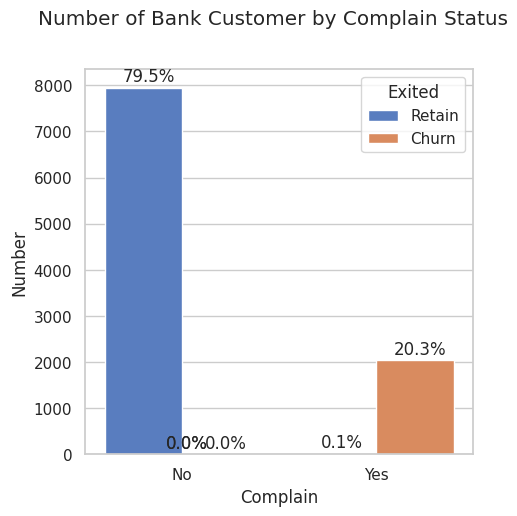

In [38]:
# initialize chart title
chart = 'Number of Bank Customer by Complain Status'

# apply the procedure to plot the chart
countplot_univariate(df, 'Complain', 'Exited', 'Complain', 0, 2, ['No', 'Yes'], 5, 5, 1, \
                     'vertical', chart)


The graph above shows the distribution of 'Complain'. All bank customers who churn are customers who also make complaints against the bank.

BIVARIATE ANALYSIS

In [39]:
sns.set_theme(style="white")

df2 = df.copy()
df2['Churn Status'] = df2['Exited'].map({1: 'Churn', 0: 'Retain'})

In [40]:


# define a procedure to plot boxplot and histplot for bivariate analysis
def distribution_bivariate(data, x, y, hue, width, height, label):

    # create a new figure with the specified width and height
    fig, axes = plt.subplots(1, 2, figsize=(width, height))

    # create a boxplot based on the specified parameter
    sns.boxplot(ax=axes[0], y=y, x=x, showmeans=True, palette='muted', data=data)
    axes[0].set_title(f'Boxplot of {label} by Churn Status', y=1.05)

    # create a histplot based on the specified parameter
    sns.histplot(ax=axes[1], data=data, x=y, hue=hue, kde=True, palette='muted')
    axes[1].set_title(f'Histogram of {label} by Churn Status', y=1.05)

    plt.tight_layout()
    plt.show()

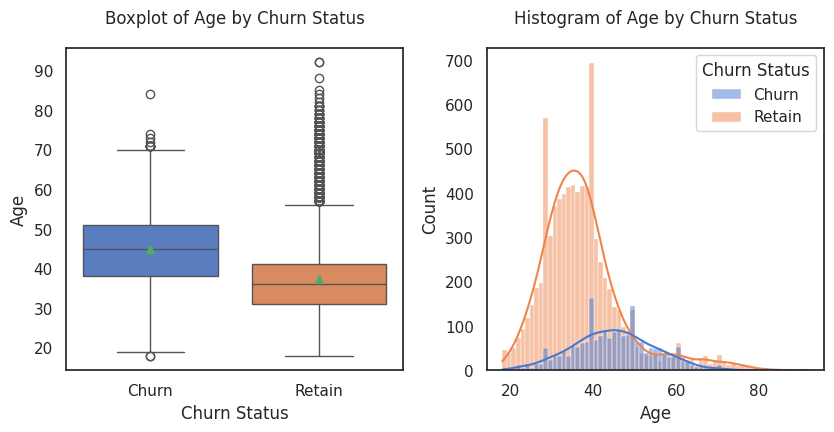

In [41]:
# apply the procedure to plot the chart
distribution_bivariate(df2, 'Churn Status', 'Age', 'Churn Status', 8.5, 4.5, 'Age')

The above graph shows the distribution of 'Age' based on churn status. The age distribution of churned and retained bank customers is relatively similar, spread between the ages of 30 years to 50 years. The age distribution of retained bank customers is mostly between the ages of 30 years and 40 years.

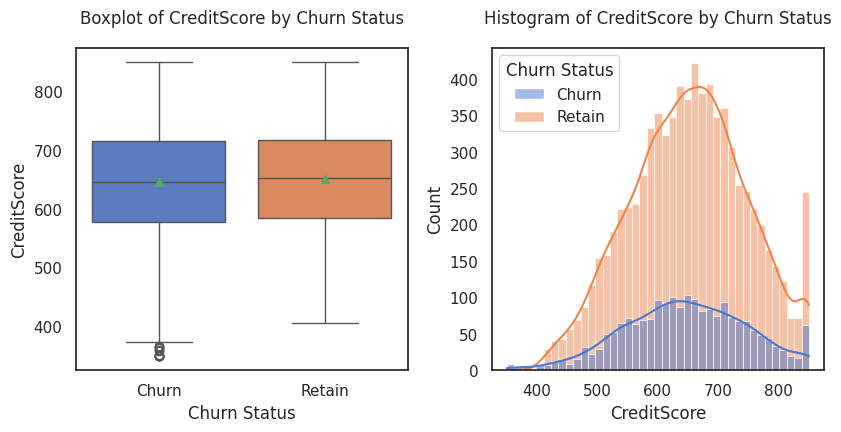

In [42]:
# apply the procedure to plot the chart
distribution_bivariate(df2, 'Churn Status', 'CreditScore', 'Churn Status', 8.5, 4.5, 'CreditScore')

The chart above shows the distribution of 'CreditScore' by churn status. The credit score distribution of churn and retain customers is similar, spread between 600 and 700.

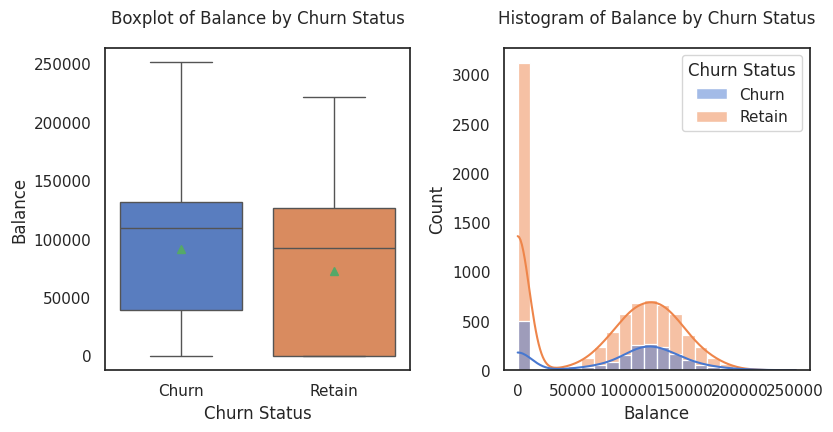

In [43]:
# apply the procedure to plot the chart
distribution_bivariate(df2, 'Churn Status', 'Balance', 'Churn Status', 8.5, 4.5, 'Balance')

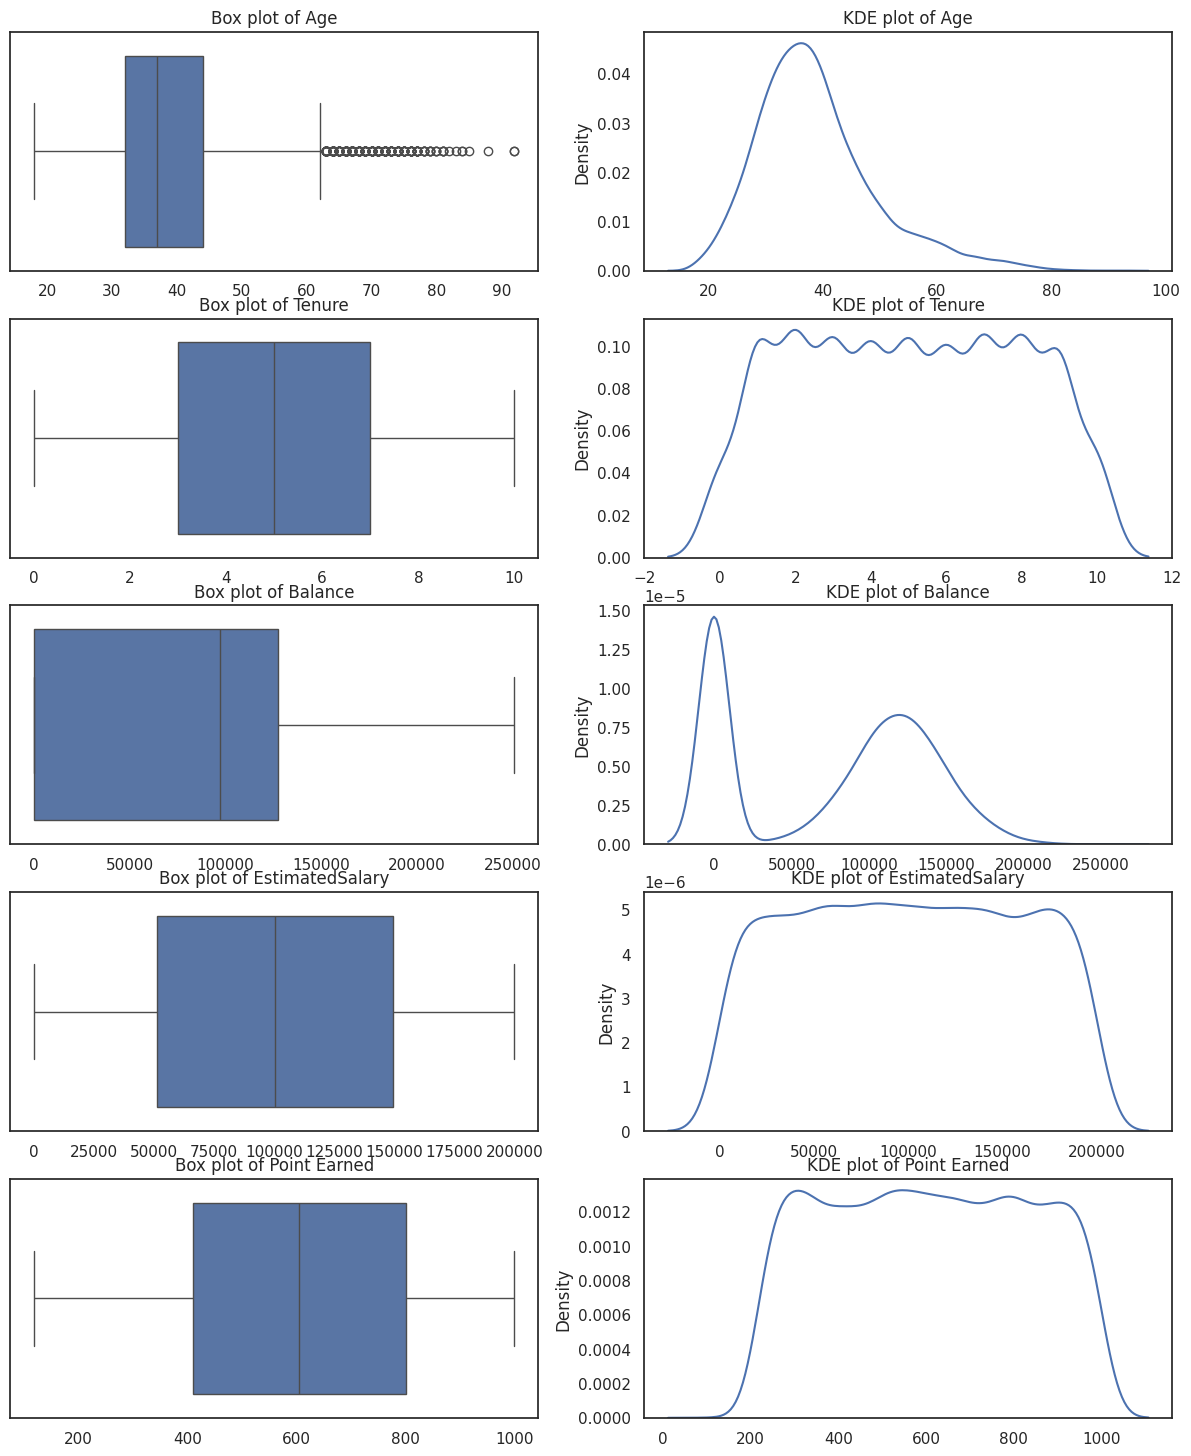

In [44]:
# Checking for outliers

# Approach 1 Boxplots
fig, ax = plt.subplots(5,2,figsize=(15,18))
numerical_features = ['Age','Tenure','Balance','EstimatedSalary', 'Point Earned']
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df,x=numerical_features[i],ax = ax[i,0]).set(title=f'Box plot of {numerical_features[i]}',xlabel=None)
    sns.kdeplot(data=df,x=numerical_features[i],ax = ax[i,1]).set(title=f'KDE plot of {numerical_features[i]}',xlabel=None)

# plt.savefig('dist of num vars.jpg')

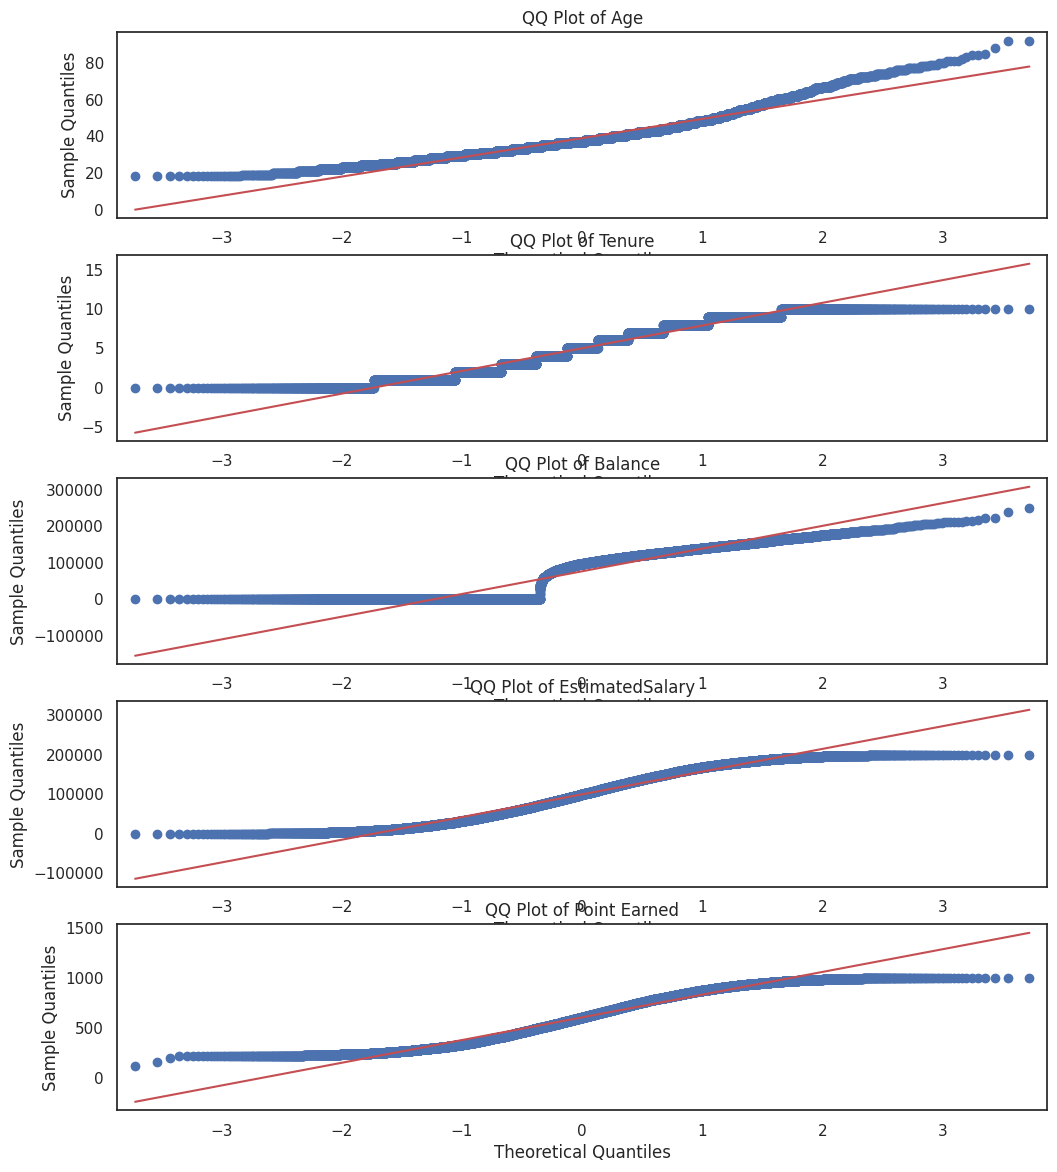

In [45]:
# Approach 2: Z-scores
# First we test whether the variables are normally distributed or not (through visual inspection of the kde it looks to be non-normal)
import statsmodels.api as sm
# Q-Q Plot
fig, ax = plt.subplots(5,1,figsize=(12,14))
for i, feature in enumerate(numerical_features):
    sm.qqplot(df[feature],line='s',ax=ax[i])
    ax[i].set_title(f'QQ Plot of {feature}')
# plt.savefig('./vizes/QQPlot.jpg')

on-normality: All five numerical features deviate from the normal distribution. This non-normality suggests that methods assuming normality, such as Z-scores for outlier detection, may not be appropriate.

Heavy Tails and Skewness: The deviations indicate the presence of heavy tails and skewness, which can impact statistical analyses and the detection of outliers.

In [46]:
df.shape

(10000, 17)

In [48]:
# Approach 3: Multivariate Outlier Detection
# Using Mahalanobis Distance (Robust)

# Function for mahalanobis_distance
def mahalanobis_distances(X, mean, cov):
    diff = X - mean
    md = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov)), diff.T).diagonal())
    return md

In [49]:
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

In [50]:
# Robust covariance estimator
robust_cov = MinCovDet().fit(df[numerical_features])

# Calculate Mahalanobis distances using robust estimations
mean_vector = robust_cov.location_
cov_matrix = robust_cov.covariance_
df['RobustMahalanobisDist'] = mahalanobis_distances(df[numerical_features].values, mean_vector, cov_matrix)

# Determine the threshold for outliers (95% confidence interval)
threshold = chi2.ppf(0.95, len(numerical_features))

# Identify outliers
df['RobustOutlier'] = df['RobustMahalanobisDist'] > threshold

# Filter outliers
outliers_data_robust = df[df['RobustOutlier']]

print(f"Number of multivariate outliers detected using robust Mahalanobis distance: {outliers_data_robust.shape[0]}")
outliers_data_robust[['Age','Tenure','Balance','EstimatedSalary', 'Point Earned', 'RobustMahalanobisDist']].describe()

Number of multivariate outliers detected using robust Mahalanobis distance: 0


,Age,Tenure,Balance,EstimatedSalary,Point Earned,RobustMahalanobisDist
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
no outliers detected

In [ ]:
threshold

9.521074130395917

In [51]:
df.drop(['RobustMahalanobisDist'],axis=1,inplace=True)
df.head(2)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group,RobustOutlier
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50,False
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50,False


In [53]:
df.drop(['RobustOutlier'],axis=1,inplace=True)
df.head(2)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50


In [54]:
df.shape

(10000, 17)

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# define a function to encode category data into numeric
def encode_data(data, columns, method):

    # one-hot encoding
    if method == 'ohe':
        encoded_columns = pd.get_dummies(data[columns],drop_first=True, prefix=columns)
        data = pd.concat([data, encoded_columns], axis=1)
        data.drop(columns, axis=1, inplace=True)

    # ordinal encoding
    elif method == 'ordinal':
        ordinal_enc = OrdinalEncoder()
        encoded_columns = ordinal_enc.fit_transform(data[columns])
        data[columns] = encoded_columns
        data[columns] = encoded_columns.astype(int)



        # for column in columns:
        #     frequency_encoding = data[column].value_counts(normalize=True).to_dict()
        #     data[column] = data[column].replace(frequency_encoding)

    return data

In [56]:
ordinal_columns = ['Card Type', 'Age Group']

df_new = df.copy()

# apply the 'encode_data' function to 'ordinal_columns'
df_new= encode_data(df_new, ordinal_columns, method='ordinal')

df_new

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,1
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,0,300,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,3,564,0
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339,1


In [57]:
ohe= ['Geography', 'Gender']



# apply the 'encode_data' function to 'ordinal_columns'
df_new= encode_data(df_new, ohe, method='ohe')

df_new

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,1,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,0,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1,0,300,0,False,False,True
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771,0,False,False,True
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,3,3,564,0,False,False,False
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339,1,True,False,True


correlation

<Axes: >

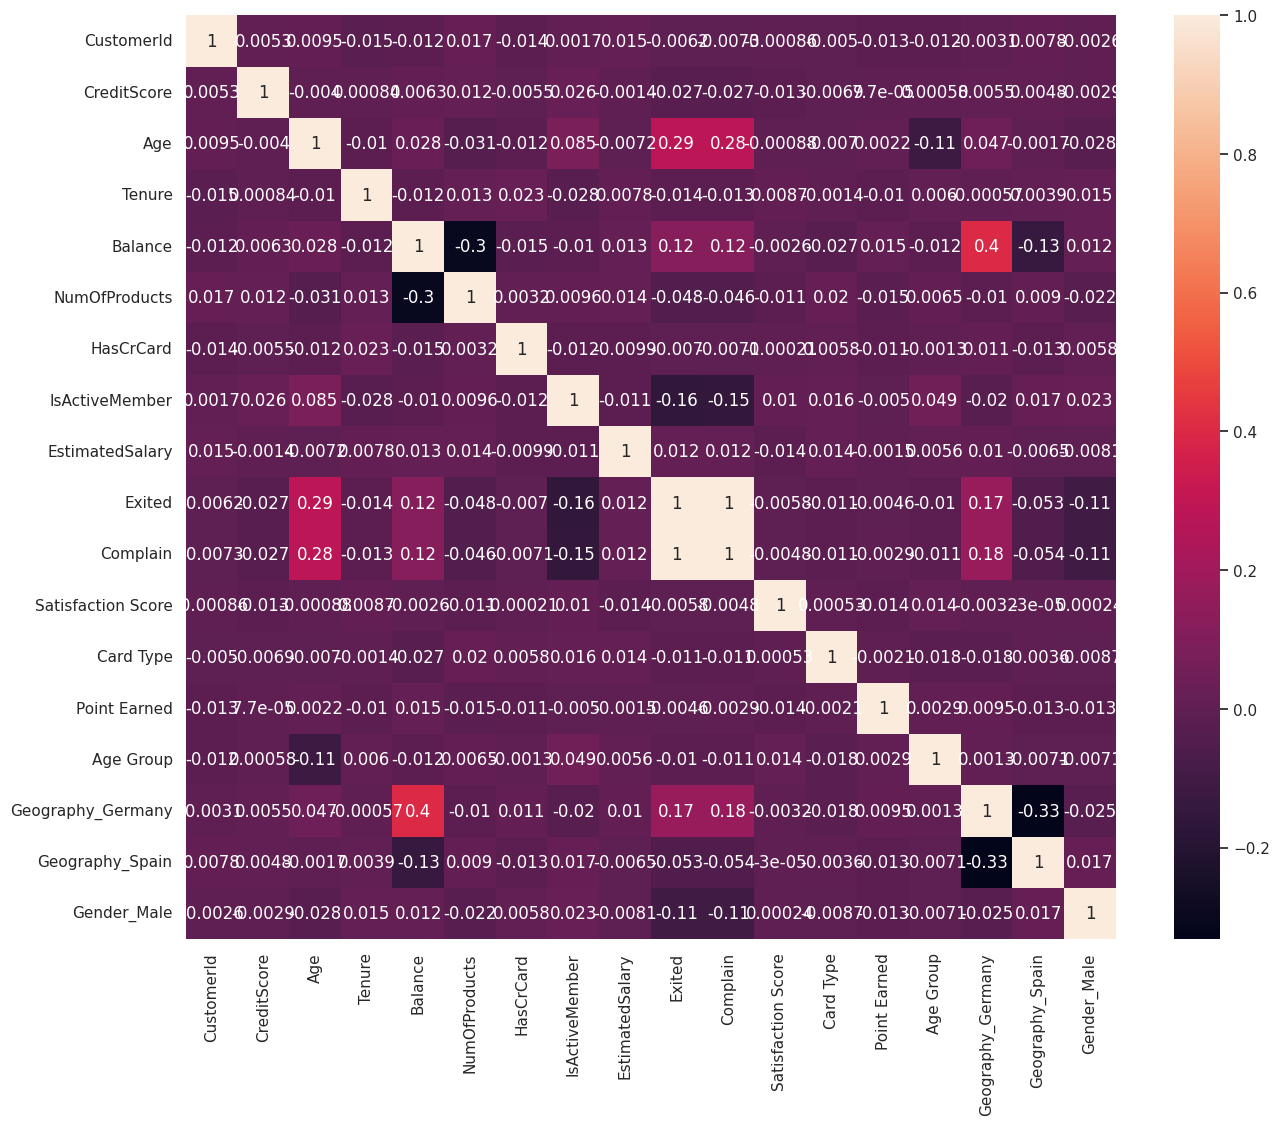

In [58]:
plt.figure(figsize=(15,12))
sns.heatmap(df_new.corr(),annot=True)

churn highly correlated with complain,geography,age\
also balance and geography have good correlation

Checking Assumptions
We have to check some assumptions for the logistic model to give a relevant interpretation. Here are some of the assumptions we are looking to check:

Multicolinearity,
Outlier Removal,
Independence of outcomes (which we assume from the data found),
Linearity of log

In [61]:
# Assuming x is your DataFrame with boolean columns
x['Geography_Germany'] = x['Geography_Germany'].astype(int)
x['Geography_Spain'] = x['Geography_Spain'].astype(int)
x['Gender_Male'] = x['Gender_Male'].astype(int)

# Now all the boolean columns are converted to int type
print(x.dtypes)  # This will show the updated data types of your columns


CustomerId              int64
CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Complain                int64
Satisfaction Score      int64
Card Type               int64
Point Earned            int64
Age Group               int64
Geography_Germany       int64
Geography_Spain         int64
Gender_Male             int64
dtype: object


In [62]:
# Checking multicolinearity
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each variable
def vif(X):
    X_v = add_constant(X)  # include your predictors
    vif = pd.DataFrame()
    vif["Variable"] = X_v.columns
    vif["VIF"] = [variance_inflation_factor(X_v.values, i) for i in range(X_v.shape[1])]
    print(vif)
vif(x)

              Variable           VIF
0                const  47746.619658
1           CustomerId      1.001599
2          CreditScore      1.001886
3                  Age      1.126461
4               Tenure      1.002580
5              Balance      1.340054
6        NumOfProducts      1.123666
7            HasCrCard      1.001961
8       IsActiveMember      1.050812
9      EstimatedSalary      1.001723
10            Complain      1.177522
11  Satisfaction Score      1.001101
12           Card Type      1.002220
13        Point Earned      1.001367
14           Age Group      1.019091
15   Geography_Germany      1.362138
16     Geography_Spain      1.124989
17         Gender_Male      1.013509


since all the vif are very close to one no multicolliniearity

In [63]:
x['Gender_Male'].unique()

array([0, 1])

In [102]:
sns.set_theme(style="white")

# initialize X as features and y as target
x = df_new.drop(['Exited'], axis=1)
y = df_new['Exited'].values

# split the data into train and test sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y, random_state=21)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Age Group,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,2,0,464,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,1,3,0,456,1,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,3,0,377,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,5,1,350,0,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,5,1,425,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,1,0,300,0,False,False,True
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,5,2,771,0,False,False,True
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,3,3,564,0,False,False,False
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,2,1,339,1,True,False,True


In [64]:
##handling imbalanced data using SMOTE
from imblearn.over_sampling import SMOTE

In [65]:
X_bal,y_bal = SMOTE().fit_resample(x,y)

In [66]:
pd.Series(y_bal).value_counts()

,count
1,7962
0,7962


In [90]:
sns.set_theme(style="white")

# initialize X as features and y as target
x = df_new.drop(['Exited'], axis=1).values
y = df_new['Exited'].values

# split the data into train and test sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.25, random_state=0)

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
ss=StandardScaler()
X_train_trans=ss.fit_transform(X_train)
X_test_trans=ss.transform(X_test)

In [95]:
ss=StandardScaler()
X_bal_trans=ss.fit_transform(X_bal)


In [93]:
ss=StandardScaler()
X_train_trans=ss.fit_transform(X_train)
X_test_trans=ss.transform(X_test)

In [97]:
lr=LogisticRegression(max_iter=50)


In [87]:
lr.fit(X_train_trans,y_train)

LogisticRegression()

In [88]:
y_pred=lr.predict(X_test_trans)

In [89]:
accuracy_score(y_test,y_pred)

0.9987440341622708

In [75]:
accuracy_score(y_test,y_pred)

0.9987442444537463

In [76]:
# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Recall       : 0.9978605049208387
ROC-AUC Score: 0.9987254183760277
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2441
           1       1.00      1.00      1.00      2337

    accuracy                           1.00      4778
   macro avg       1.00      1.00      1.00      4778
weighted avg       1.00      1.00      1.00      4778

Confusion Matrix:

 [[2440    1]
 [   5 2332]]


In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
np.mean(cross_val_score(lr,X_bal_trans,y_bal,scoring='f1',cv=5))

0.9982414395477545

In [100]:
print('accuracy:',np.mean(cross_val_score(lr,X_bal_trans,y_bal,scoring='accuracy',cv=5)))
print('precision:',np.mean(cross_val_score(lr,X_bal_trans,y_bal,scoring='precision',cv=5)))
print('recall:',np.mean(cross_val_score(lr,X_bal_trans,y_bal,scoring='recall',cv=5)))

accuracy: 0.9982416004670134
precision: 0.9987459978024834
recall: 0.9977390877803959


In [105]:
print('roc_auc:',np.mean(cross_val_score(lr,X_bal_trans,y_bal,scoring='roc_auc',cv=5)))

roc_auc: 0.9995483900332527


In [ ]:
# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Recall       : 0.9905862216516902
ROC-AUC Score: 0.985051406606263
Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2441
           1       0.98      0.99      0.98      2337

    accuracy                           0.98      4778
   macro avg       0.98      0.99      0.98      4778
weighted avg       0.99      0.98      0.98      4778

Confusion Matrix:

 [[2391   50]
 [  22 2315]]


In [ ]:
def plot_cm(cm, chart):

    # set figure size and title
    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart}', y=1)

    # initialize TP, TN, FN, and FP counts
    group_names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
    group_initial = ['(TN)','(FN)','(FP)','(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    # create label strings with counts and percentages
    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # plot heatmap of the confusion matrix
    g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    g.set_xlabel('Actual')
    g.set_ylabel('Predicted')

    plt.show()

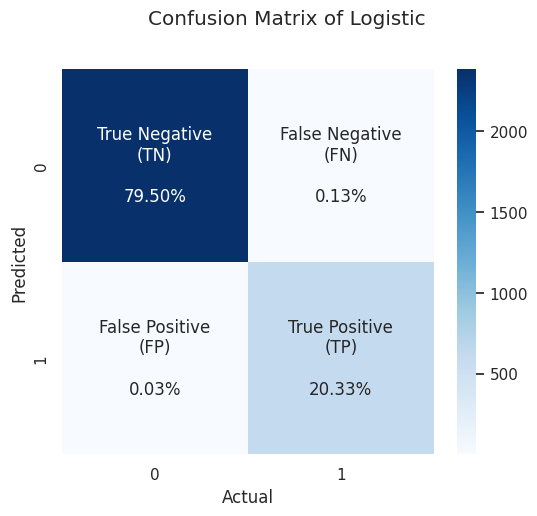

In [ ]:
chart = 'Logistic'

# plot the confusion matrix
plot_cm(cm, chart)